## Dataset Overview
This section previews the data to understand its structure.

In [5]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Kushagra Shreyashkar\\Downloads\\project3.csv")
print("\nDataset Information:")
print(df.info())

print("Dataset Preview:")
df.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32109 entries, 0 to 32108
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bounces          32109 non-null  int64  
 1   Exits            32109 non-null  int64  
 2   Continent        32109 non-null  object 
 3   Sourcegroup      32109 non-null  object 
 4   Timeinpage       32109 non-null  int64  
 5   Uniquepageviews  32109 non-null  int64  
 6   Visits           32109 non-null  int64  
 7   BouncesNew       32109 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.0+ MB
None
Dataset Preview:


,Bounces,Exits,Continent,Sourcegroup,Timeinpage,Uniquepageviews,Visits,BouncesNew
0,0,0,OC,(direct),18,1,0,0.0
1,0,0,N.America,(direct),4,1,0,0.0
2,0,0,N.America,Others,35,1,0,0.0
3,0,0,N.America,public.tableausoftware.com,70,1,0,0.0
4,0,0,N.America,public.tableausoftware.com,81,1,0,0.0


## Data Summarization
This section provides summary statistics and checks for missing values

In [7]:
summary = df.describe(include='all')
print("Summary Statistics:")
print(summary)

missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

Summary Statistics:
             Bounces         Exits  Continent Sourcegroup    Timeinpage  \
count   32109.000000  32109.000000      32109       32109  32109.000000   
unique           NaN           NaN          6           9           NaN   
top              NaN           NaN  N.America      google           NaN   
freq             NaN           NaN      20043       11542           NaN   
mean        0.713009      0.906039        NaN         NaN     73.184746   
std         0.708215      0.695819        NaN         NaN    394.441111   
min         0.000000      0.000000        NaN         NaN      0.000000   
25%         0.000000      1.000000        NaN         NaN      0.000000   
50%         1.000000      1.000000        NaN         NaN      0.000000   
75%         1.000000      1.000000        NaN         NaN     10.000000   
max        30.000000     36.000000        NaN         NaN  46745.000000   

        Uniquepageviews        Visits    BouncesNew  
count      32109.000000  

## Analyzing Relationship Between Visits and Unique Page Views
This section addresses whether unique page views depend on visits. (replacing NaN values with 0 for easier calculation)

In [9]:
visits = df['Visits'].fillna(0).tolist()
unique_pageviews = df['Uniquepageviews'].fillna(0).tolist()


mean_visits = sum(visits) / len(visits)
mean_pageviews = sum(unique_pageviews) / len(unique_pageviews)

numerator = sum((visits[i] - mean_visits) * (unique_pageviews[i] - mean_pageviews) for i in range(len(visits)))

denominator = (sum((v - mean_visits) ** 2 for v in visits) * sum((u - mean_pageviews) ** 2 for u in unique_pageviews)) ** 0.5

correlation = numerator / denominator if denominator != 0 else 0
print("Correlation between Visits and Unique pageview:", correlation)

Correlation between Visits and Unique pageview: 0.8144457070734596


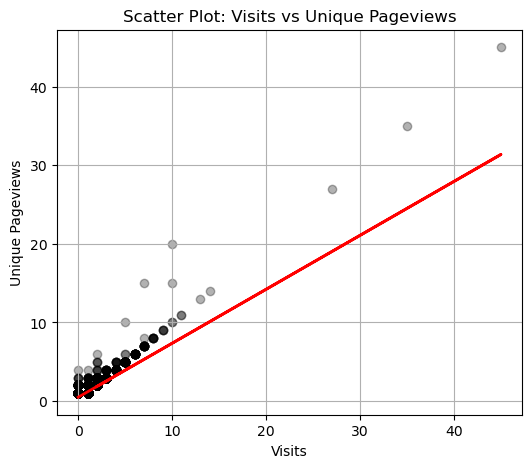

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(df['Visits'], df['Uniquepageviews'], color='black', alpha=0.3)
plt.title('Scatter Plot: Visits vs Unique Pageviews')
plt.xlabel('Visits')
plt.ylabel('Unique Pageviews')
trend_line = slope * df['Visits'] + intercept
plt.plot(df['Visits'], trend_line, color='red', linewidth=2)
plt.grid(True)
plt.show()

## Factors Affecting Exits
Identifying variables that influence exits.

In [49]:
exits = df['Exits'].fillna(0).tolist()

source_group_exits = df.groupby('Sourcegroup')['Exits'].mean()
print("Average Exits by Source Group:")
print(source_group_exits)

continent_exits = df.groupby('Continent')['Exits'].mean()
print("Average Exits by Continent:")
print(continent_exits)


Average Exits by Source Group:
Sourcegroup
(direct)                      1.016861
Others                        0.833022
facebook                      1.076087
google                        0.939179
public.tableausoftware.com    0.647710
reddit.com                    0.943182
t.co                          0.928857
tableausoftware.com           0.737437
visualisingdata.com           0.738730
Name: Exits, dtype: float64
Average Exits by Continent:
Continent
AF           0.884735
AS           0.908546
EU           0.898145
N.America    0.908846
OC           0.902655
SA           0.903743
Name: Exits, dtype: float64


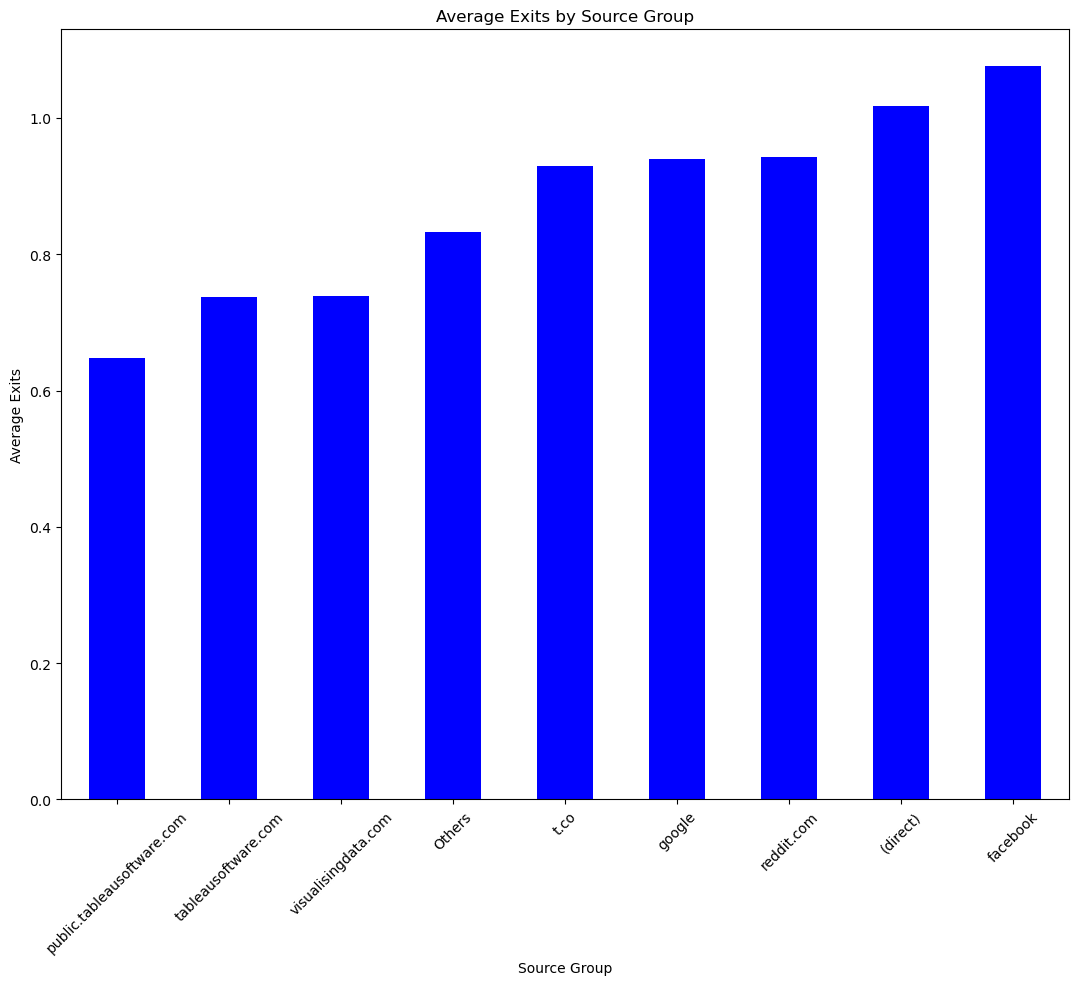

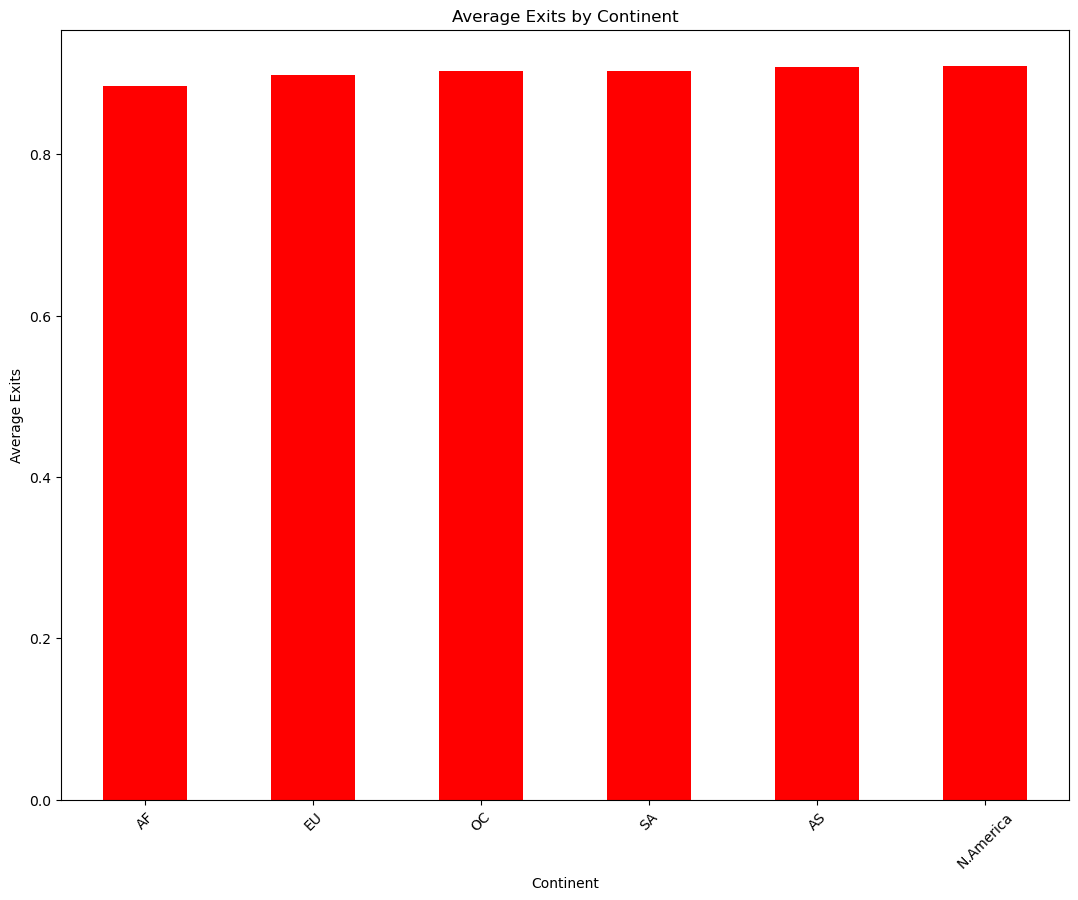

In [62]:
plt.figure(figsize=(13,10))
source_group_exits.sort_values().plot(kind='bar', color='blue')
plt.title('Average Exits by Source Group')
plt.xlabel('Source Group')
plt.ylabel('Average Exits')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(13,10))
continent_exits.sort_values().plot(kind='bar', color='red')
plt.title('Average Exits by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Exits')
plt.xticks(rotation=45)
plt.show()


## Factors Influencing Time on Page
Exploring which factors increase the time spent on a page.

In [100]:
correlation_matrix = df[['Exits', 'Timeinpage', 'Visits', 'Uniquepageviews', 'Bounces']].corr()

print("Correlation Matrix:")
print(correlation_matrix['Timeinpage'])
# grouping by source groups and calculating the mean Time on Page
source_group_time = df.groupby('Sourcegroup')['Timeinpage'].mean()
print("Average Time on Page by Source Group:")
print(source_group_time)
# grouping by continent and calculating the mean Time on Page
continent_time = df.groupby('Continent')['Timeinpage'].mean()
print("Average Time on Page by Continent:")
print(continent_time)



Correlation Matrix:
Exits              0.001325
Timeinpage         1.000000
Visits             0.066650
Uniquepageviews    0.114593
Bounces           -0.109106
Name: Timeinpage, dtype: float64
Average Time on Page by Source Group:
Sourcegroup
(direct)                       70.708178
Others                         70.377239
facebook                       57.206522
google                         67.314070
public.tableausoftware.com    134.321270
reddit.com                     49.198052
t.co                           69.923522
tableausoftware.com            90.845896
visualisingdata.com            73.274590
Name: Timeinpage, dtype: float64
Average Time on Page by Continent:
Continent
AF            55.227414
AS            60.848944
EU            60.364142
N.America     77.560744
OC            66.235251
SA           139.422460
Name: Timeinpage, dtype: float64


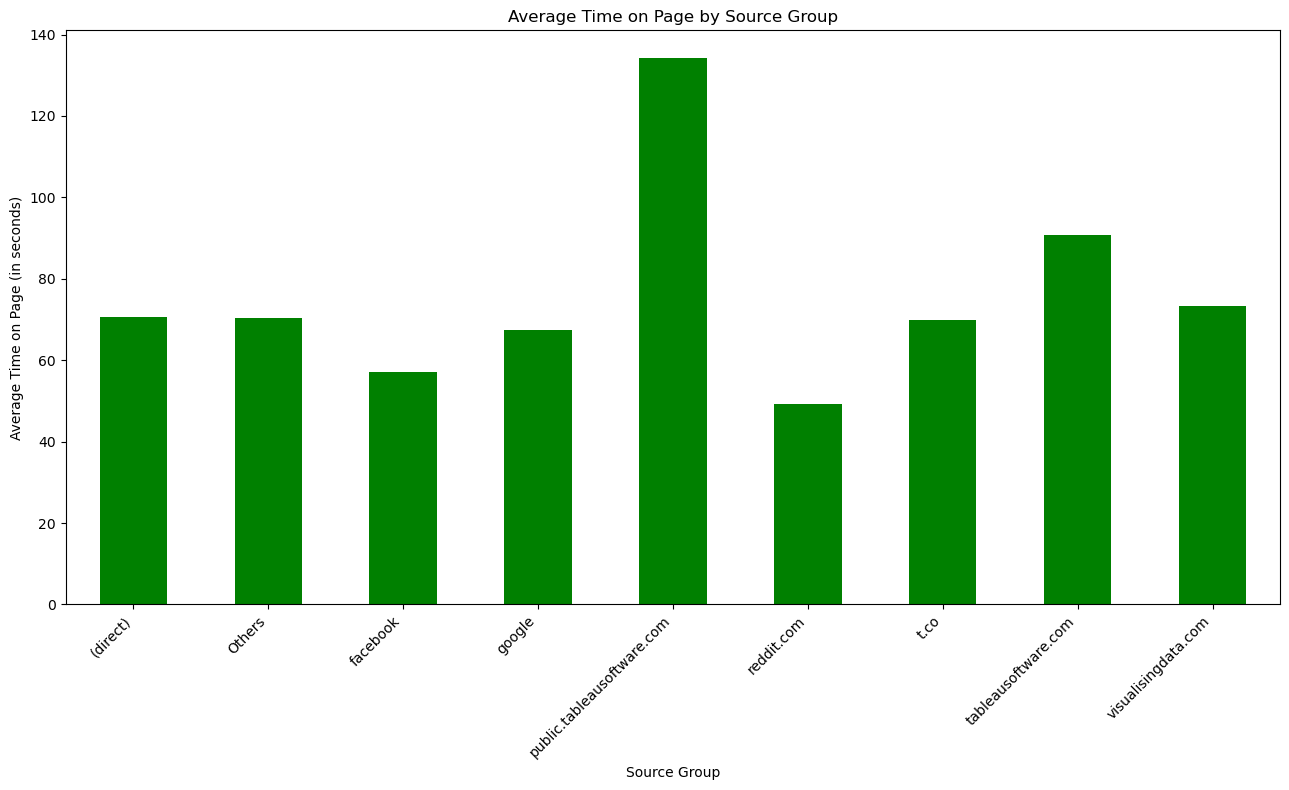

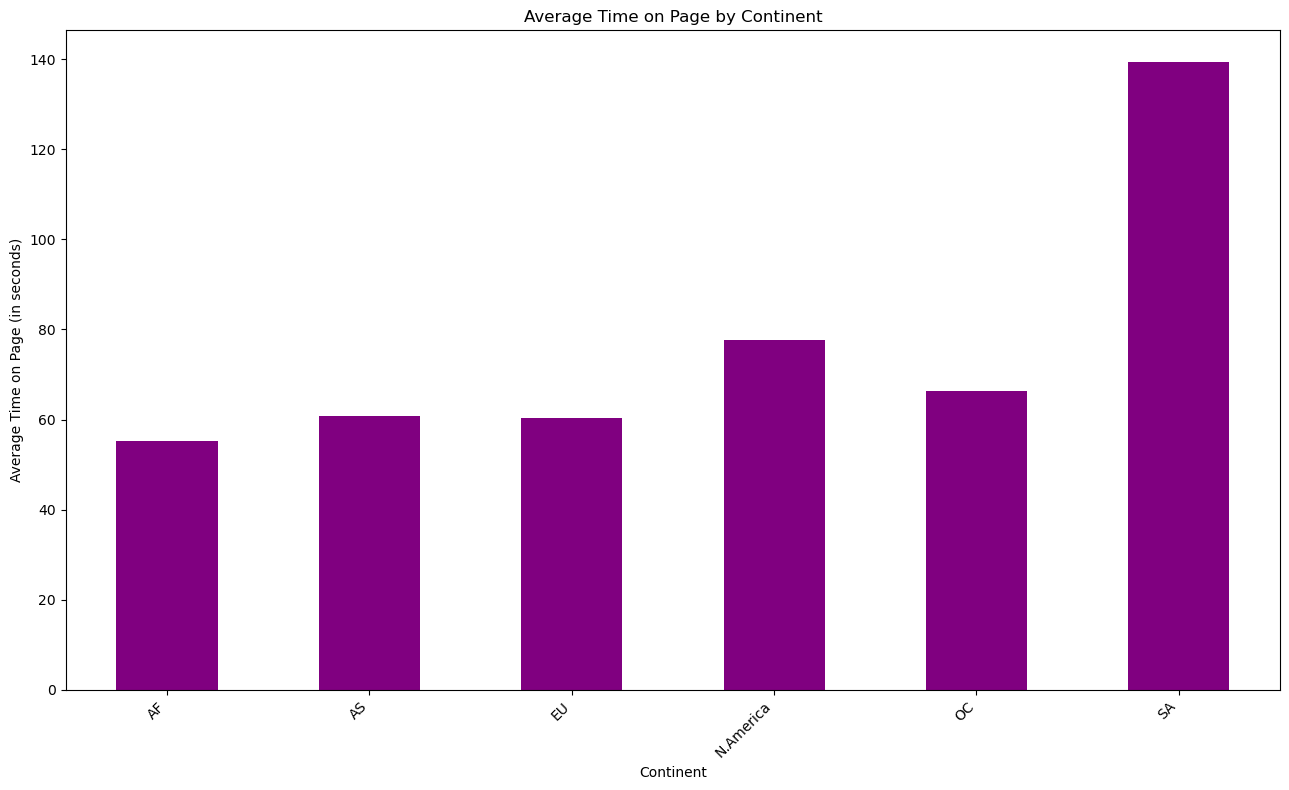

In [102]:
import matplotlib.pyplot as plt
# Plotting the average time on page by source group
source_group_time = df.groupby('Sourcegroup')['Timeinpage'].mean()

plt.figure(figsize=(13,8))
source_group_time.plot(kind='bar', color='green')
plt.title('Average Time on Page by Source Group')
plt.xlabel('Source Group')
plt.ylabel('Average Time on Page (in seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


continent_time = df.groupby('Continent')['Timeinpage'].mean()

plt.figure(figsize=(13,8))
continent_time.plot(kind='bar', color='purple')
plt.title('Average Time on Page by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Time on Page (in seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation with Time on Page
time_correlations = {
    'Bounces': -0.10910568283815052,
    'Visits': 0.06664967427612746,
    'Uniquepageviews': 0.11459254706369064
}





## Factors Impacting Bounce Rate
Examines which factors contribute to a high bounce rate.

In [115]:
print(correlation_matrix['Bounces'])

Exits              0.824912
Timeinpage        -0.109106
Visits             0.819343
Uniquepageviews    0.659101
Bounces            1.000000
Name: Bounces, dtype: float64


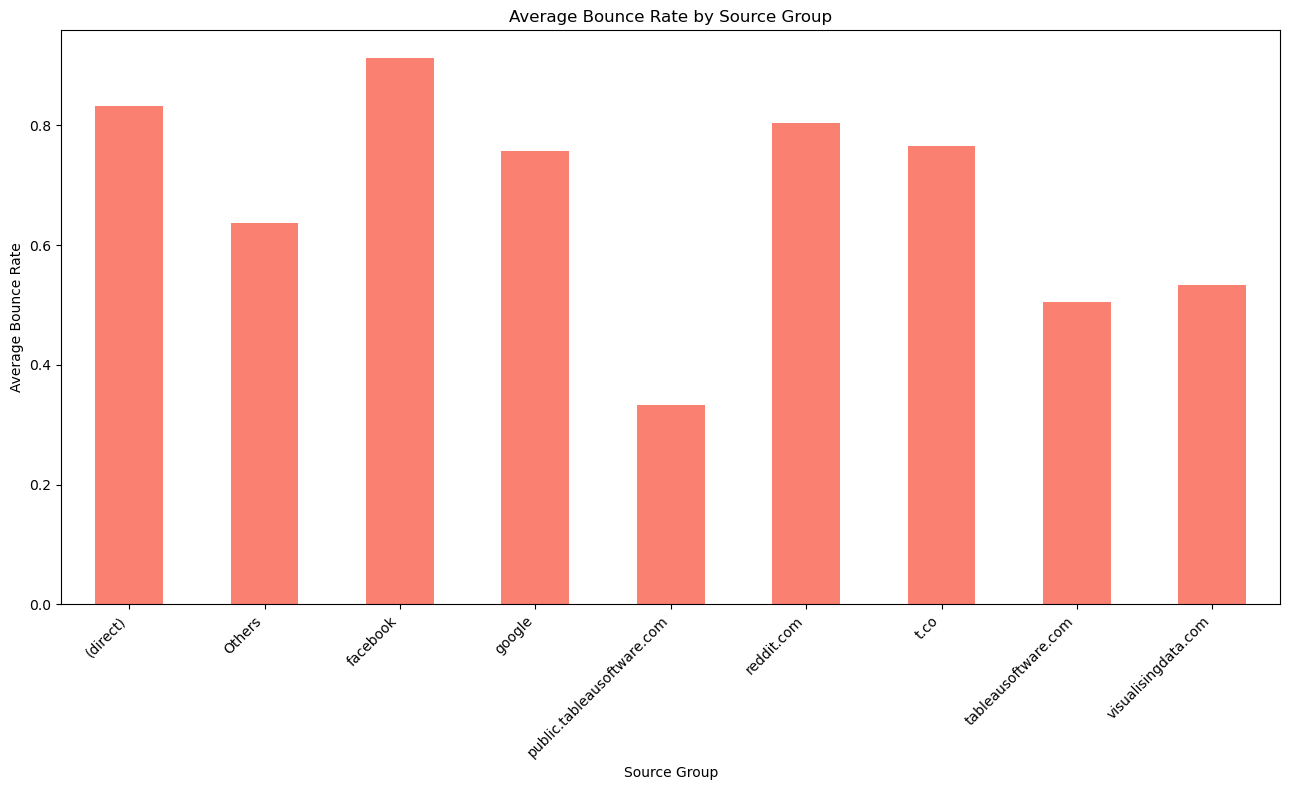

In [109]:
source_group_bounce = df.groupby('Sourcegroup')['Bounces'].mean()

source_group_bounce.plot(kind='bar', figsize=(13,8), color='orange')
plt.title('Average Bounce Rate by Source Group')
plt.xlabel('Source Group')
plt.ylabel('Average Bounce Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


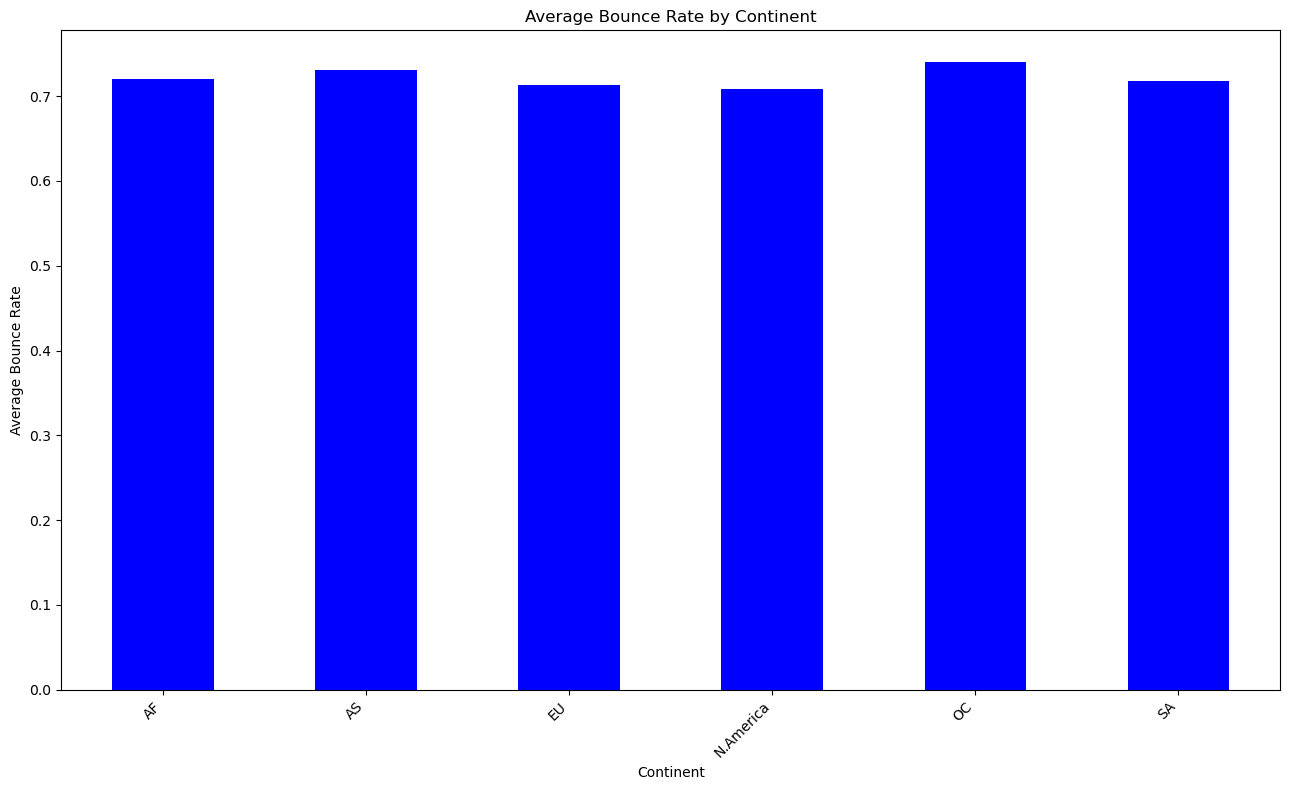

In [113]:
continent_bounce = df.groupby('Continent')['Bounces'].mean()

continent_bounce.plot(kind='bar', figsize=(13,8), color='blue')
plt.title('Average Bounce Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Bounce Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
